# Исследование успешности игр

В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Исследование начнется с ознакомления с данными, их предобработки: изучение пропущенных значений, их заполнение; рассмотрение и замена типов данных; устранение дубликатов; устранение выбивающихся значений. Затем будет проведен исследовательский анализ данных, составлен портрет пользователя каждого региона и проверены гипотезы.

## Открытие файла и изучение информации

In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
from scipy import stats as st
import math

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


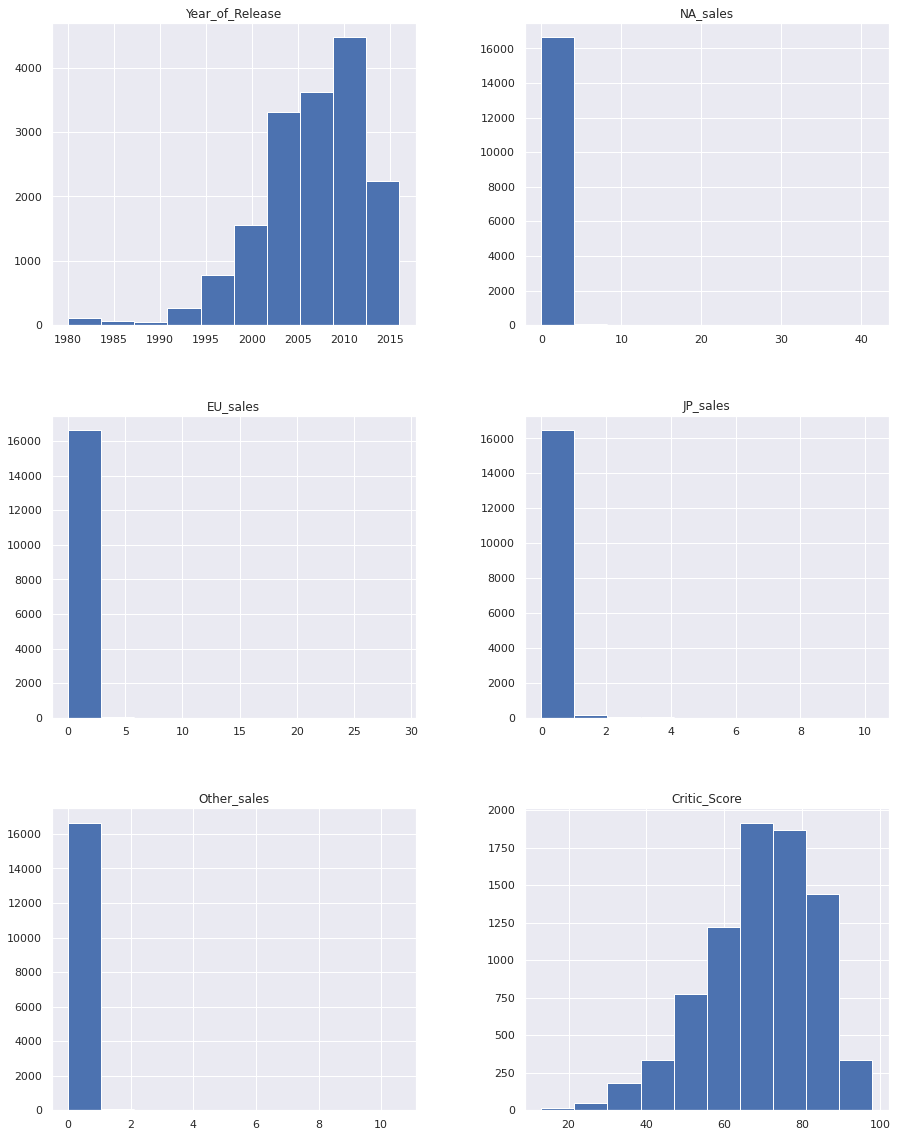

In [4]:
data.hist(figsize=(15, 20));

*Промежуточный вывод: получили общее представление о данных. Из гистограмм видно, что оценки критиков, в основном, выше среднего. Большинство игр вышли после 2000 года, а продажи во всех регионах, в среднем, не превышают 5 млн копий.*

## Предобработка данных

### Замена названий столбцов

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

*К пропускам в столбцах с оценками могло привести то, что игры могут быть совсем не популярными, следовательно, из-за этого могут отсутствовать оценки экспертов или организации ESRB. Ко всему прочему, пользователи отнюдь не всегда выставляют оценки продуктам. Также ESRB - это Американская компания, которая, скорее всего, в первую очередь обращает работает с американскими продуктами или очень популярными зарубежными.*

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [9]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

*Значение 'tbd' означает 'to be decided' или 'будет определено', можно заменить такие значения на NaN, так как оценка еще не выставлена, то есть пока ничему не равна.*

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = math.nan

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [14]:
data['user_score'] = pd.to_numeric(data['user_score'])

**Промежуточный вывод: в столбце 'year_of_release' был заменен тип данных с плавающей точкой на целочисленный, так как год может быть только целым числом. В столбце 'critic_score' встречались только целые числа, в связи с этим тип данных был заменен. В столбце 'user_score' встретилось строчное значение, из-за чего тип данных был неправильным.**

### Обработка пропусков

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


*Название игры не имеет сильного значения в данном исследовании, тем более пропущенных значений в датафрейме всего два. Заменим такие записи на 'Unknown'*

In [16]:
data.loc[data['name'].isna(), 'name'] = 'Unknown'

*Год выпуска, напротив, имеет довольно большое значение. Записей с пропущенным значением в столбце с годом выпуска чуть меньше трехсот, что составляет меньше 2% от всего объема датафрейма. Такие пропуски нельзя заполнить очевидными значениями. Можно искать каждую игру по названию и смотреть год выхода, но, во-первых: это займет очень много времени, а во-вторых: у одной игры может быть несколько изданий с разными годами выпуска, порой с одним названием. Таким образом, было принято решение избавиться от записей с пропущенным значением в столбце 'year_of_release'*

In [17]:
good_data = data.loc[data['year_of_release'].isna() == False]

*В столбце 'genre' пропущены всего две записи. Жанр имеет значение в исследовании. Эти две строчки можно удалить.*

In [18]:
good_data = good_data.loc[data['genre'].isna() == False]

**В столбцах с оценками и рейтингом много пропущенных значений. Удалить такие записи нельзя, так как пропадет большАя часть данных. Заполнить синтетическими значениями тоже не выйдет, так как это сильно исказит результаты исследования. Таким образом, принято решения оставить пропуски в этих столбцах.**

In [19]:
#заполним пропуски в столббце rating значением NotRated
good_data['rating'] = good_data['rating'].fillna('NotRated')

### Добавление столбца с суммарными продажами

In [20]:
good_data['total_sales'] = good_data['na_sales'] + good_data['eu_sales'] + good_data['jp_sales'] + good_data['other_sales']
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NotRated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NotRated,31.38


### Работа с дубликатами

In [21]:
good_data.duplicated().sum()

0

*Явных дубликатов нет*

In [22]:
good_data.duplicated(subset=['name', 'platform']).sum()

3

In [23]:
good_data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [24]:
good_data[good_data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E,0.01


In [25]:
good_data[good_data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


*Записи, у которых совпадают лишь названия и платформы, можно оставить, так как разработчики через несколько лет после выхода игры могут выкатить другое издание, remaster, перезапуск, возможно, не меняя название. А вот запись, где совпали не только название и платформа, но и год выхода, следует удалить.*

In [26]:
good_data.drop([16230], axis=0, inplace=True)

In [27]:
good_data[good_data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,<NA>,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E,0.23


*Промежуточный вывод: были заменены названия столбцов на корректные, в соответствии стилю snake_case. ББыли преобразованы типы данных у столбцов, обработаны пропуски, дубликаты, также добавлен столбец с суммарными продажами.*

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [28]:
good_data.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

*Об играх, выпущенных до 1993 года в датафрейме мало записей, не больше 100 игр с 1980. Можно избавиться от таких записей, так как во-первых: это поможет избавиться от хвостов, а во-вторых: игры столь давних времен выпуска вряд ли имеют много общего с современными играми и могут помочь с анализом факторов успешности современных игр.*

In [29]:
good_data = good_data[good_data['year_of_release'] > 1993]
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NotRated,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80


Text(0, 0.5, 'Количество игр')

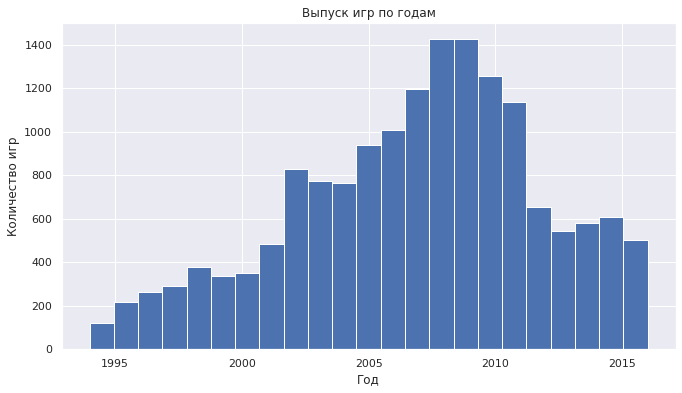

In [30]:
good_data.hist('year_of_release', bins=23, figsize=(11, 6));
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')

### Как менялись продажи по платформам

In [31]:
good_data.groupby('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
3DO        0.10
NES        0.11
TG16       0.16
SCD        0.36
NG         1.23
WS         1.42
GEN        8.13
DC        15.95
SAT       33.59
PSV       53.81
WiiU      82.19
SNES      84.67
GB       152.08
XOne     159.32
GC       196.73
N64      218.01
XB       251.57
PC       252.66
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.76
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

In [32]:
low_platforms = good_data.groupby('platform')['total_sales'].sum().sort_values().head(13)

In [33]:
#выберем платформы с наибольшим количеством продаж, наименьшей будет платформа GEN
top_platforms = good_data.query('platform not in @low_platforms.index').reset_index(drop=True)
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NotRated,31.38
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
15088,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NotRated,0.01
15089,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,NotRated,0.00
15090,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NotRated,0.01
15091,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NotRated,0.01


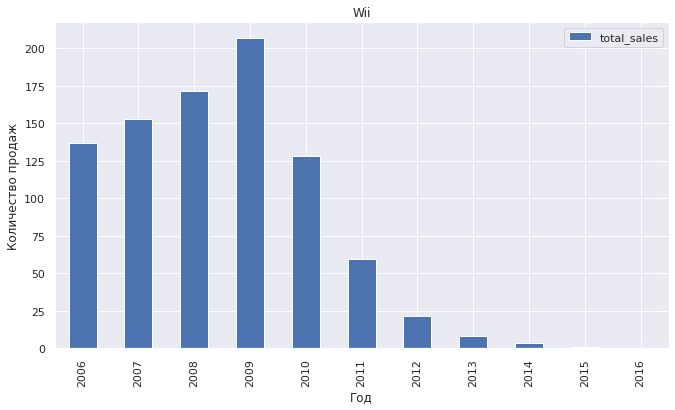

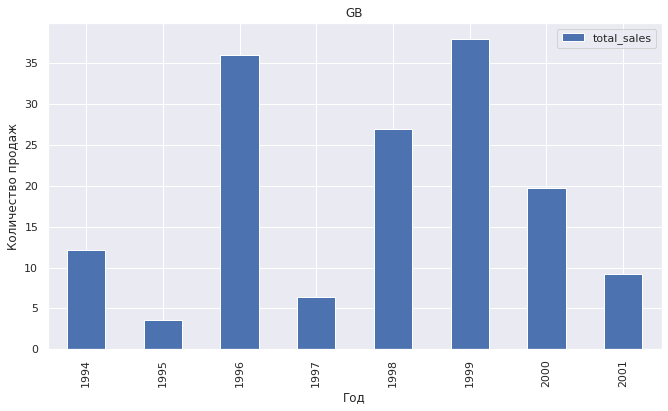

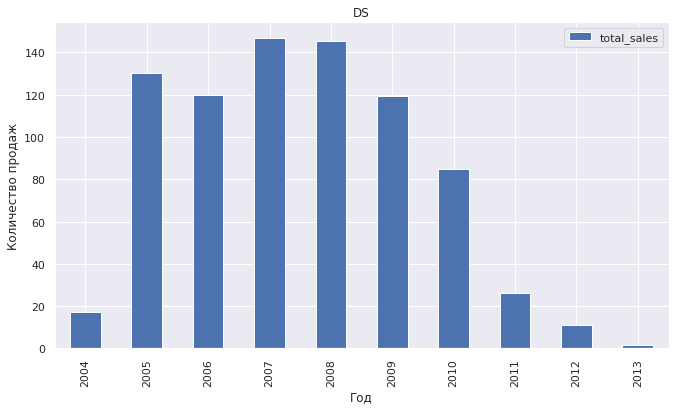

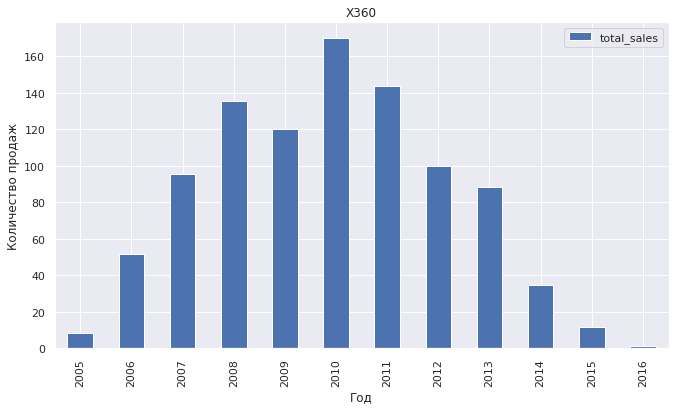

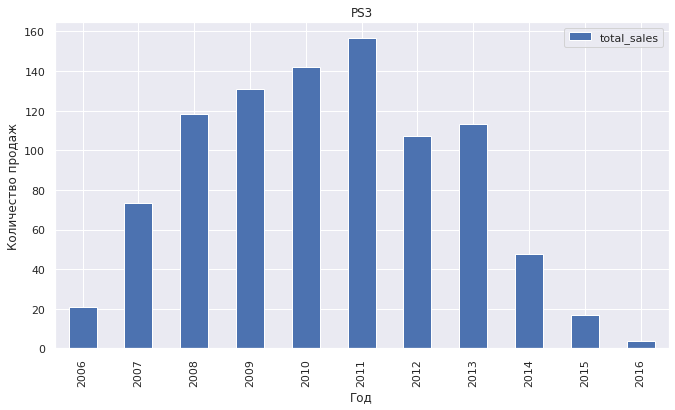

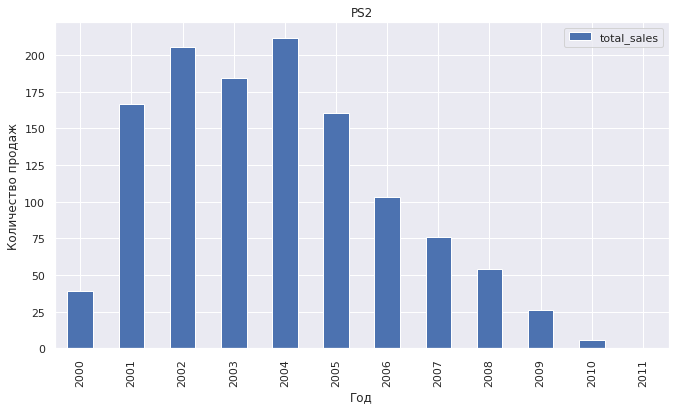

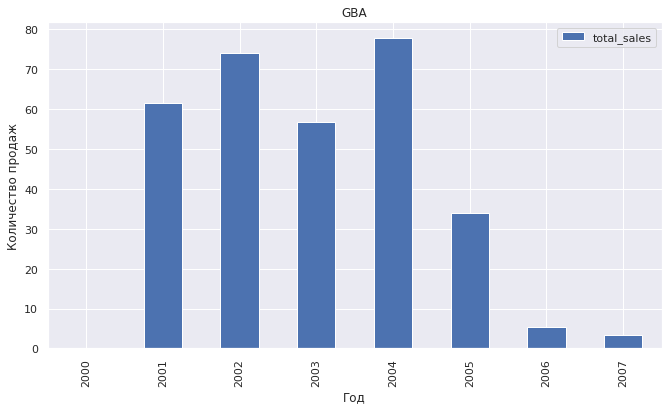

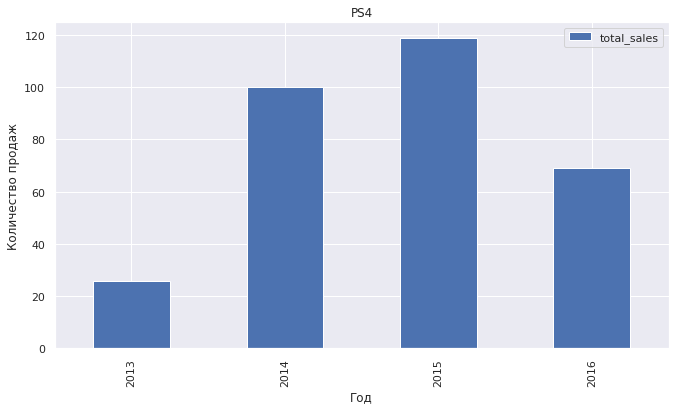

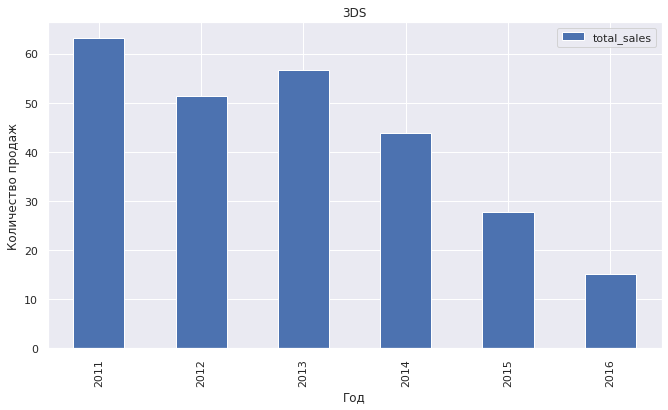

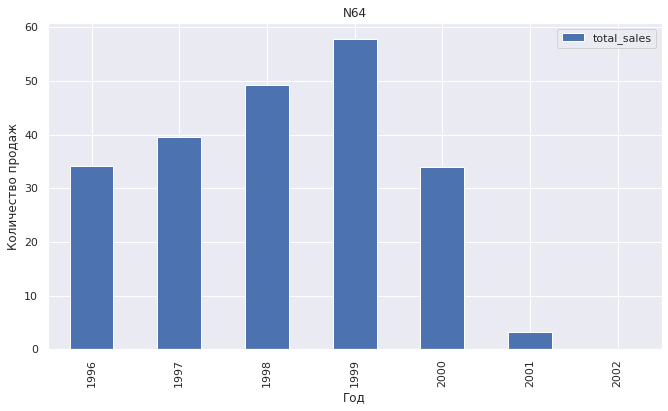

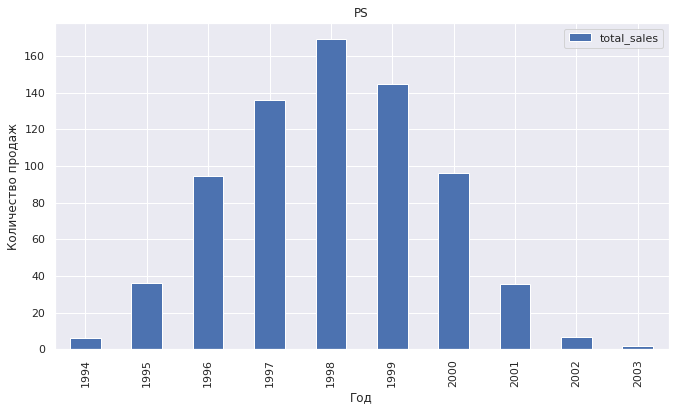

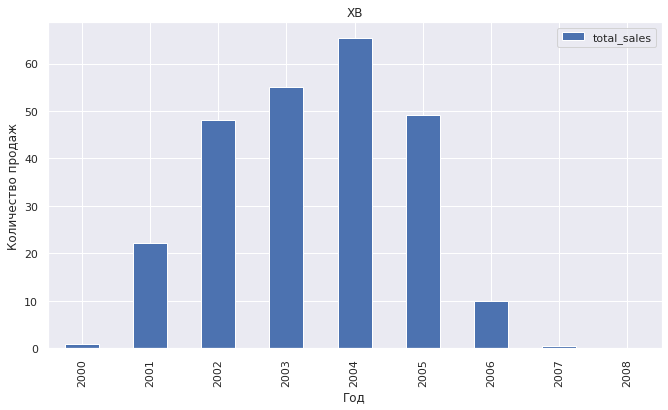

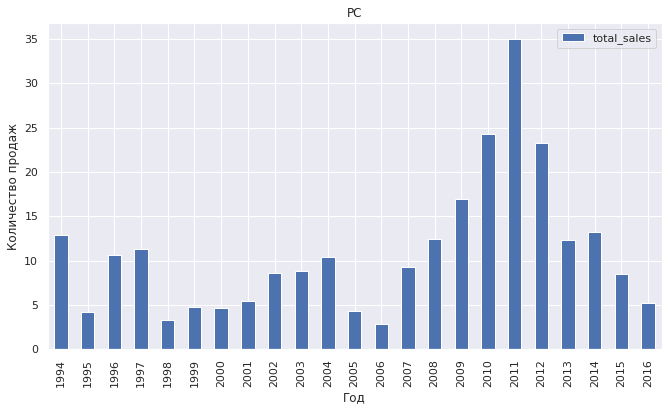

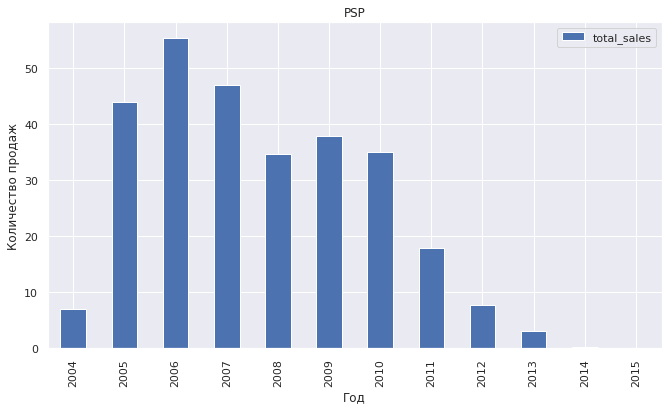

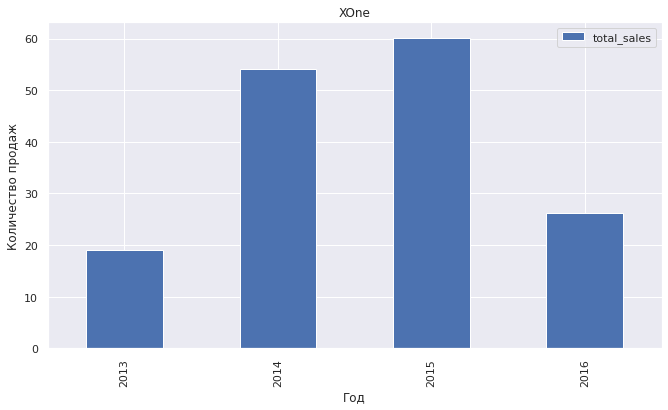

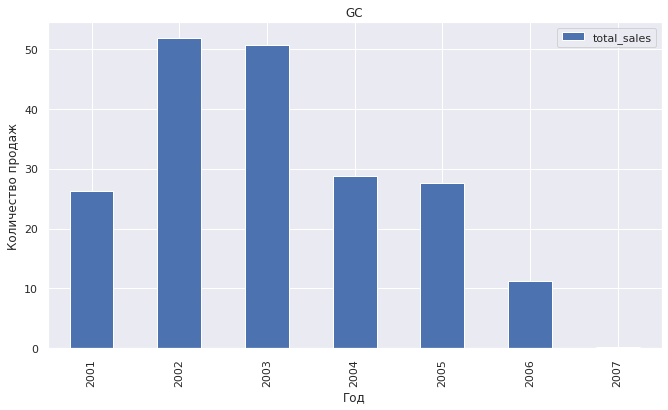

In [34]:
for platform in top_platforms['platform'].unique():
    (
        top_platforms[top_platforms['platform'] == platform]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(figsize=(11,6), kind='bar')
    )
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')

*Промежуточный вывод: в среднем платформа "живет", то есть сохраняет свою актуальность, в течение 7-9 лет. Разумеется, исключением является ПК, так как у этой платформы есть возможность апгрейда, замены старых комплектующих, да и в целом компьютер давно является незаменимым атрибутом повседневной жизни.*

**За актуальный период будем считать 3 года. Индустрия видеоигр развивается очень стремительно и продукты в ней устаревают довольно быстро.**

In [35]:
#отбросим записи раньше 2009 года
relevant_platforms = top_platforms[top_platforms['year_of_release'] > 2013].reset_index(drop=True)
relevant_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NotRated,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NotRated,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NotRated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,NotRated,0.01
1317,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NotRated,0.01
1318,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NotRated,0.01
1319,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01


### Актуальные платформы

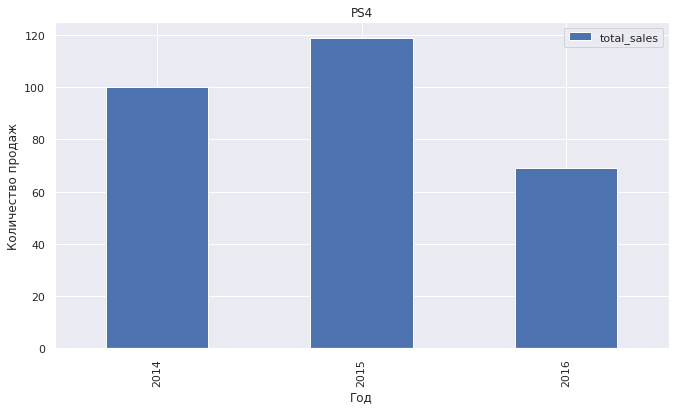

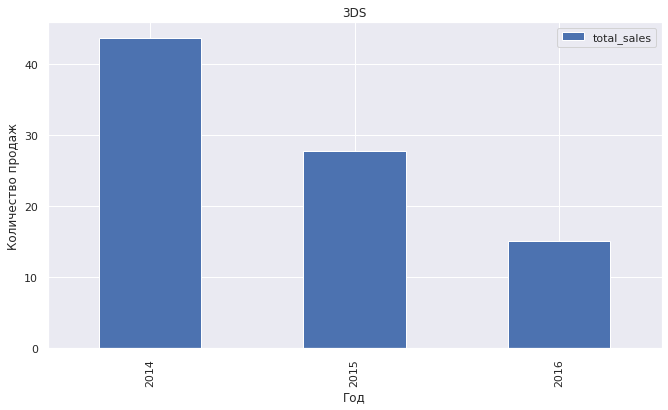

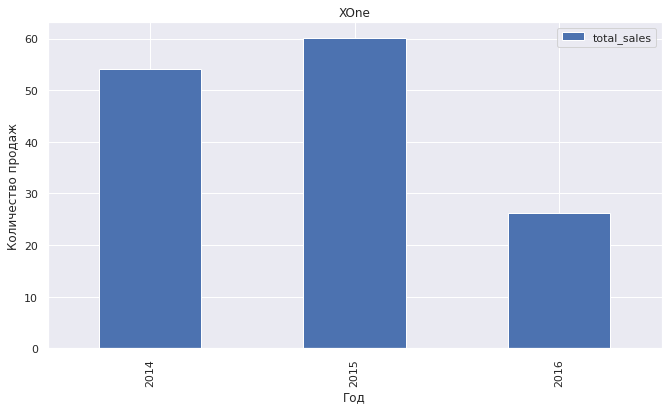

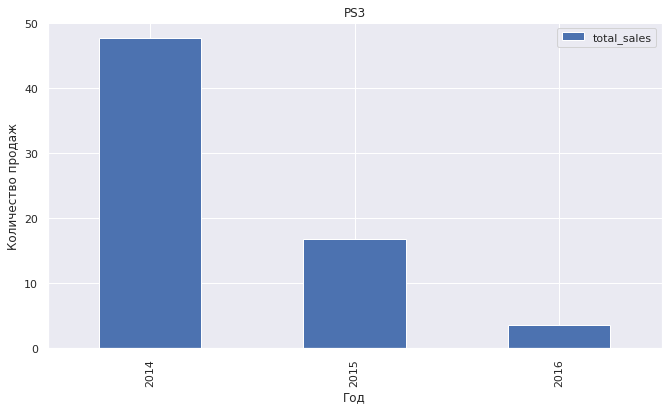

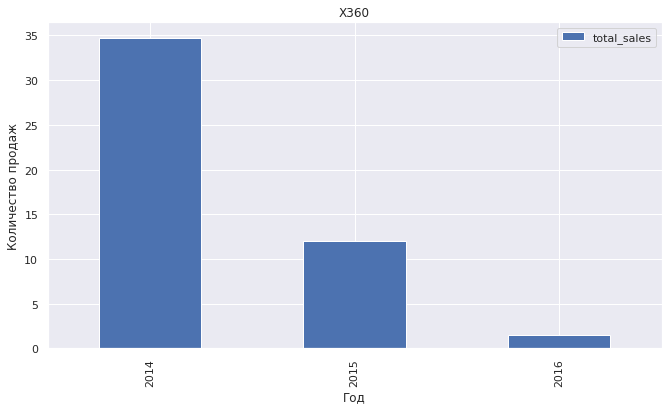

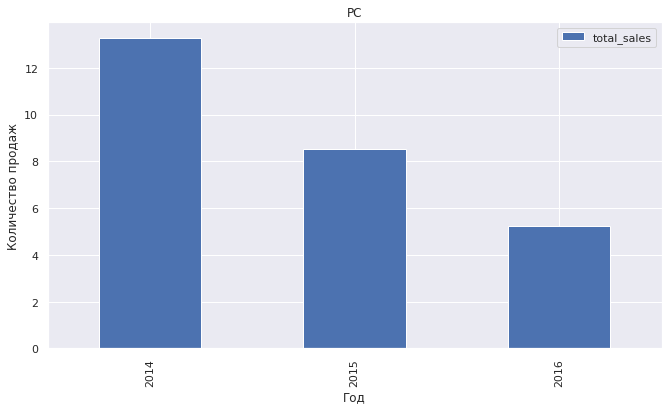

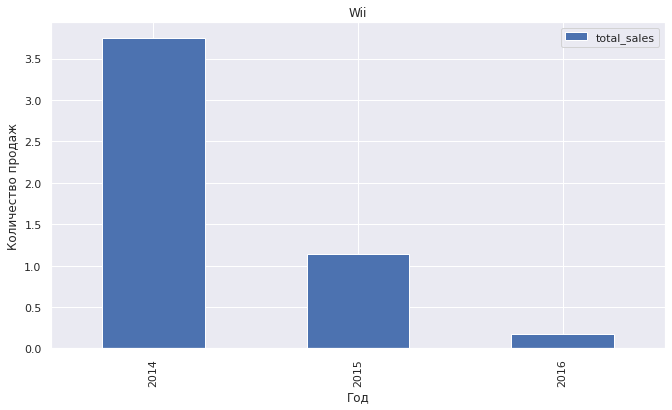

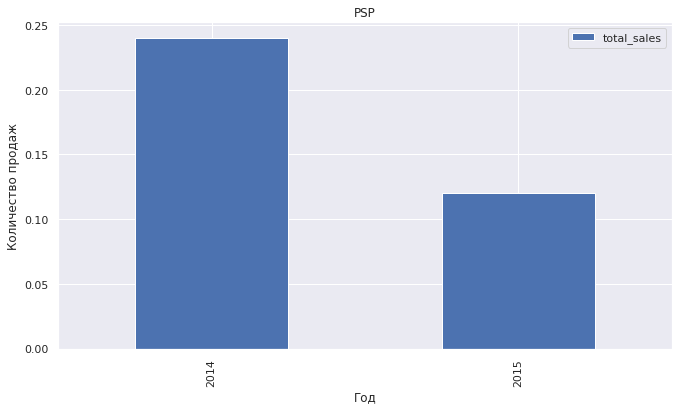

In [36]:
for platform in relevant_platforms['platform'].unique():
    (
        relevant_platforms[relevant_platforms['platform'] == platform]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(kind='bar', figsize=(11, 6))
    )
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')

**В техническом задании указано, что данные за 2016 год могут быть неполными, это может объяснять падение продаж за 2016 год по сравнению с 2015 на всех платформах. Если отбросить этот момент, самыми привлекательными и актуальными платформами на конец 2016 года можно считать: XOne и PS4. Эти консоли вышли в 2013 году, так что останутся актуальными еще минимум года на 4. PC может считаться привлекательной платформой за счет своей стабильности и распространенности. Но на графике видно, что продажи не столь велики и в 2015 году, по сравнению с 2014, продажи упали. Возможно, это связано дороговизной комплектующих или пиратством. Также относительно неплохие продажи демонстрирует платформа 3DS, но она так же демонстрирует тенденцию к снижению продаж. Кроме всего прочего, платформа вышла в 2011, таким образом, время ее актуальности скоро подойдет к концу.**

### График размаха

Text(0, 0.5, 'Количество продаж')

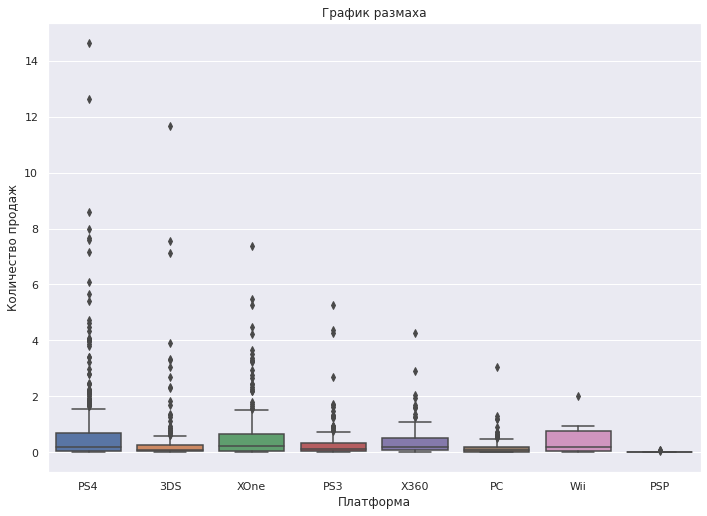

In [37]:
sns.boxplot(data=relevant_platforms, x='platform', y='total_sales');
plt.title('График размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Text(0, 0.5, 'Количество продаж')

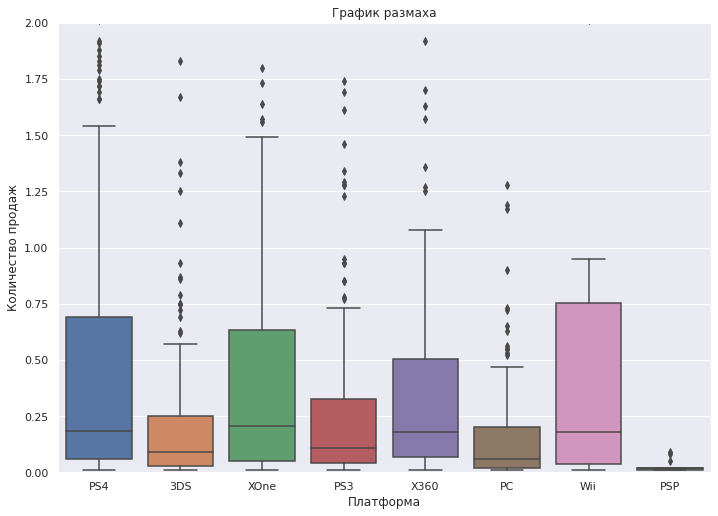

In [38]:
sns.boxplot(data=relevant_platforms, x='platform', y='total_sales');
plt.ylim([0, 2])
plt.title('График размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

*Самые большие медианные значения продаж у консолей PS4, XOne, X360 и Wii. У PS4 и XOne самый длинный правый ус. Как видно из графиков, в основном, игры продаются тиражами до полутора млн копий. Хиты, продажи которых больше 10 млн копий, скорее, являются исключением, что, собственно, ожидаемо и логично.*

### Влияние отзывов на продажи

#### PS4

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Оценка критиков')

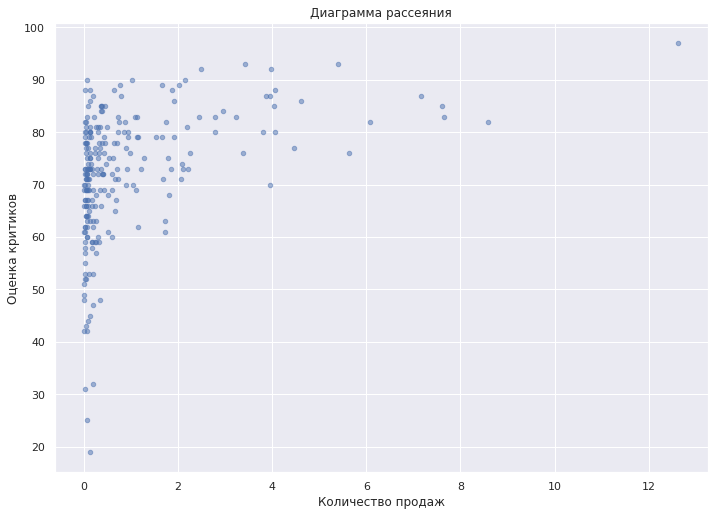

In [40]:
#влияние отзывов критиков
relevant_platforms[relevant_platforms['platform'] == 'PS4'].plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5);
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество продаж')
plt.ylabel('Оценка критиков')

*На графике распределения видно, что зависимость продаж от оценки критиков все же прослеживается, она прямо пропорциональна.*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Оценка пользователей')

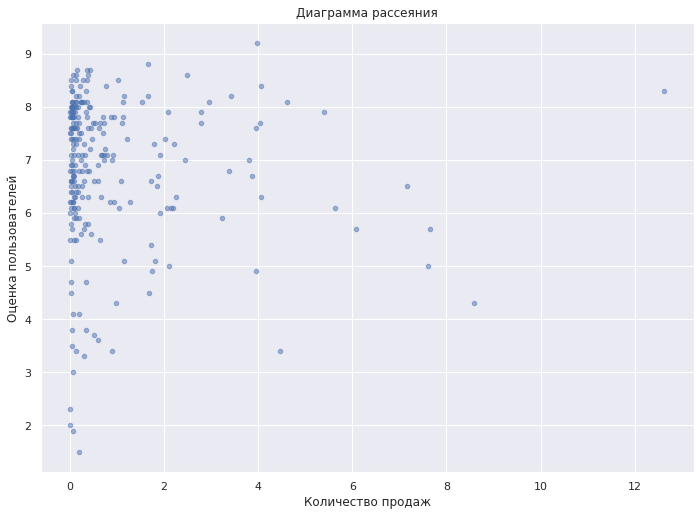

In [77]:
#влияние отзывов пользователей
relevant_platforms[relevant_platforms['platform'] == 'PS4'].plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5);
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество продаж')
plt.ylabel('Оценка пользователей')

In [42]:
(
    relevant_platforms[relevant_platforms['platform'] == 'PS4']['total_sales']
    .corr(relevant_platforms[relevant_platforms['platform'] == 'PS4']['user_score'])
)

-0.040131589472697356

*Зависимости между отзывами пользователей и продажами практически нет.*

#### XOne

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Оценка критиков')

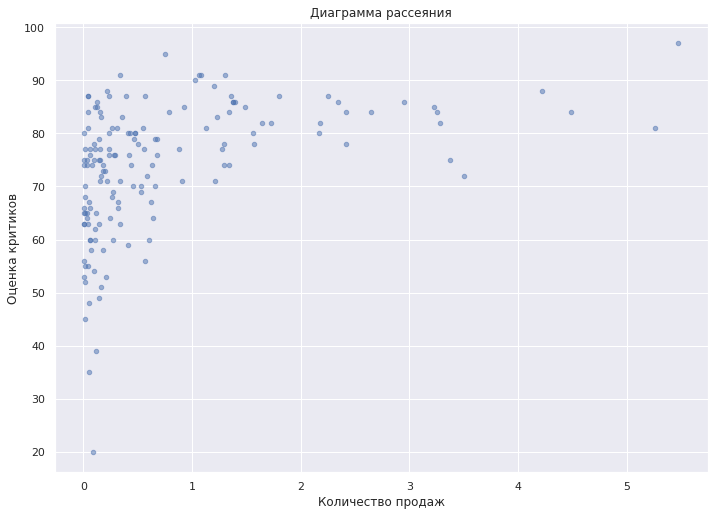

In [78]:
#влияние отзывов критиков
relevant_platforms[relevant_platforms['platform'] == 'XOne'].plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5);
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество продаж')
plt.ylabel('Оценка критиков')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Оценка пользователей')

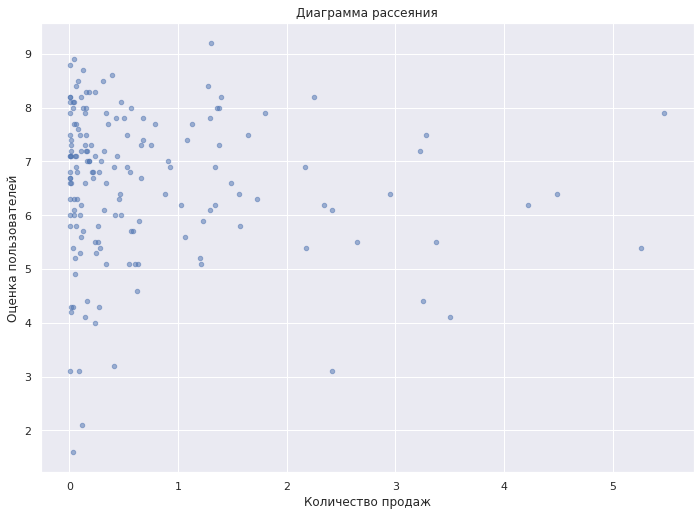

In [79]:
#влияние отзывов пользователей
relevant_platforms[relevant_platforms['platform'] == 'XOne'].plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5);
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество продаж')
plt.ylabel('Оценка пользователей')

In [45]:
(
    relevant_platforms[relevant_platforms['platform'] == 'XOne']['total_sales']
    .corr(relevant_platforms[relevant_platforms['platform'] == 'XOne']['user_score'])
)

-0.0703839280647581

#### PC

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Оценка критиков')

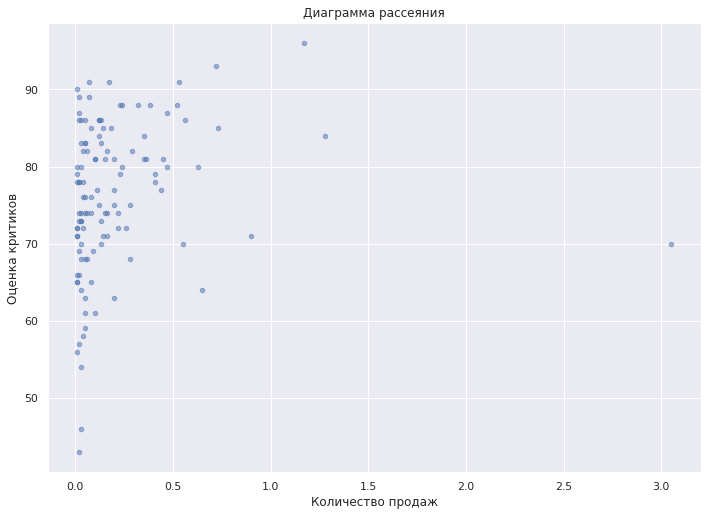

In [80]:
#влияние отзывов критиков
relevant_platforms[relevant_platforms['platform'] == 'PC'].plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5);
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество продаж')
plt.ylabel('Оценка критиков')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Оценка пользователей')

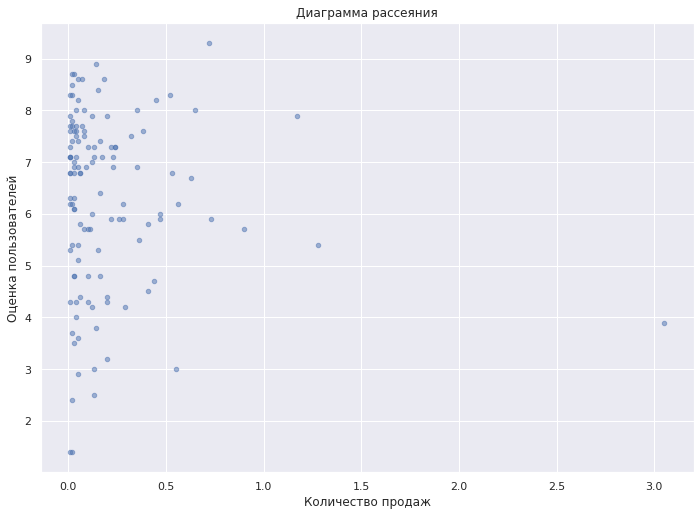

In [81]:
#влияние отзывов пользователей
relevant_platforms[relevant_platforms['platform'] == 'PC'].plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5);
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество продаж')
plt.ylabel('Оценка пользователей')

In [48]:
(
    relevant_platforms[relevant_platforms['platform'] == 'PC']['total_sales']
    .corr(relevant_platforms[relevant_platforms['platform'] == 'PC']['user_score'])
)

-0.07159665703472452

*Можно сделать вывод, что на других платформах тенденция сохраняется.*

### Распеделение игр по жанрам

Text(0, 0.5, 'Количество')

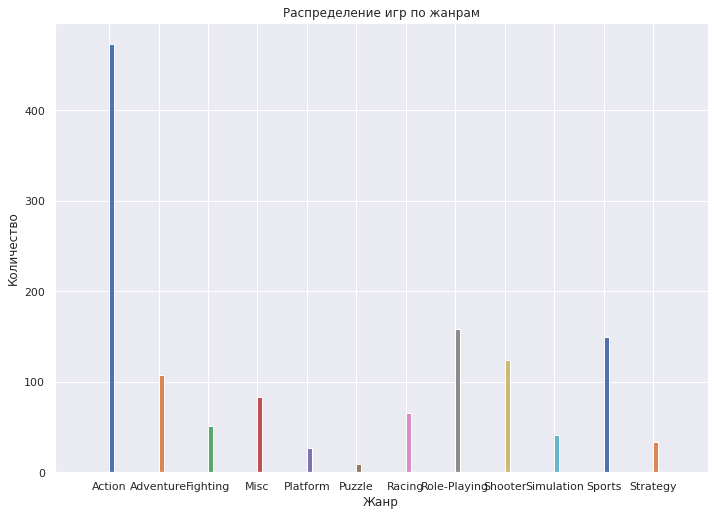

In [83]:
relevant_platforms.groupby('genre')['genre'].hist();
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество')

*Больше всего игр в жанре Action, их 2 раза больше, чем в жанре Misc, втором по популярности. Также можно отметить жанры Sports, Adventure, Role-Playing и Shooter.*

Text(0, 0.5, 'Количество продаж')

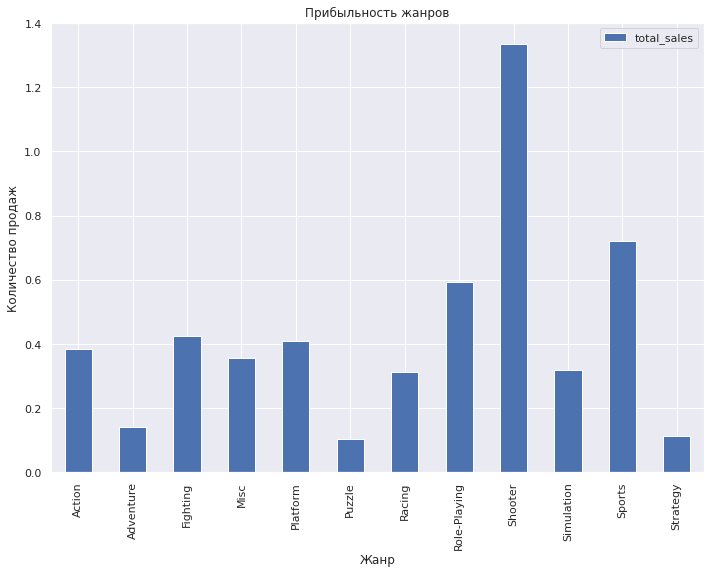

In [84]:
relevant_platforms.pivot_table(index='genre', values='total_sales').plot(kind='bar');
plt.title('Прибыльность жанров')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

*Самыми прибыльными в свою очередь являются жанры Shooter, Platform, Sports и Role-playing. Самым неприбыльным жанром, несмотря на популярность, является Adventure. Жанры Puzzle и Strategy непопулярные и неприбыльные.*

## Портрет пользователя каждого региона

### Самые популярные платформы

#### Регион NA

Text(0, 0.5, 'Количество продаж')

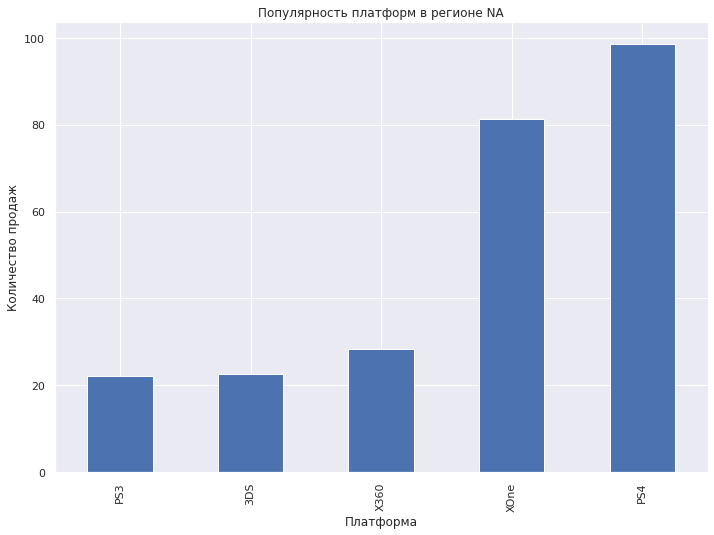

In [85]:
relevant_platforms.groupby('platform')['na_sales'].sum().sort_values().tail().plot(kind='bar');
plt.title('Популярность платформ в регионе NA')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

#### Регион EU

Text(0, 0.5, 'Количество продаж')

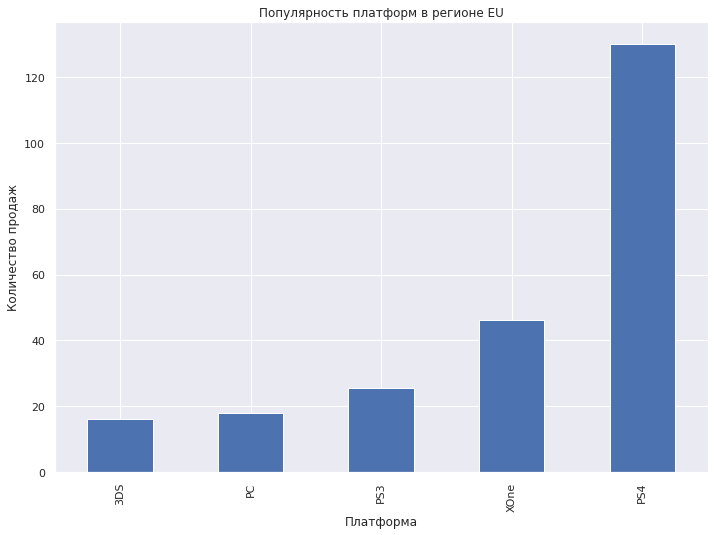

In [86]:
relevant_platforms.groupby('platform')['eu_sales'].sum().sort_values().tail().plot(kind='bar');
plt.title('Популярность платформ в регионе EU')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

#### Регион JP

Text(0, 0.5, 'Количество продаж')

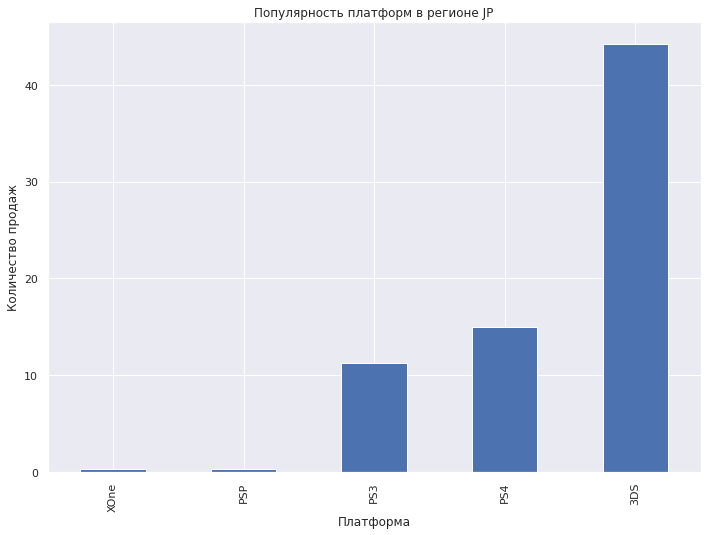

In [87]:
relevant_platforms.groupby('platform')['jp_sales'].sum().sort_values().tail().plot(kind='bar');
plt.title('Популярность платформ в регионе JP')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

*Как и ожидалось, в Северной Америке лидирует консоль XBOX от американской компании Microsoft, а в Японии все 5 позиций заняли консоли японского происхождения от компаний Sony и Nintendo. Это может объясняться более высокой ценой на импортные продукты из-за логистических издержек, бОльшую направленность компаний на внутренний рынок, соответственно, бОльшие расходы на маркетинг, большее доверие пользователя к отечественному продукту. В Европе, ожидаемо, XBOX и PlayStation имеют почти равную популярность, но японская приставка все же впереди. Скорее всего, это связано с большей направленностью Sony на европейский регион, хорошей репутацией компании и, в частности, линейки PlayStation, а также наличием эксклюзивов, среди которых игры, являющиеся мировыми хитами, обладатели множеством престижных наград (такие, например, как "The Last of Us", "God of War", "Uncharted" и т.д.).*

### Самые популярные жанры

#### Регион NA

Text(0, 0.5, 'Количество продаж')

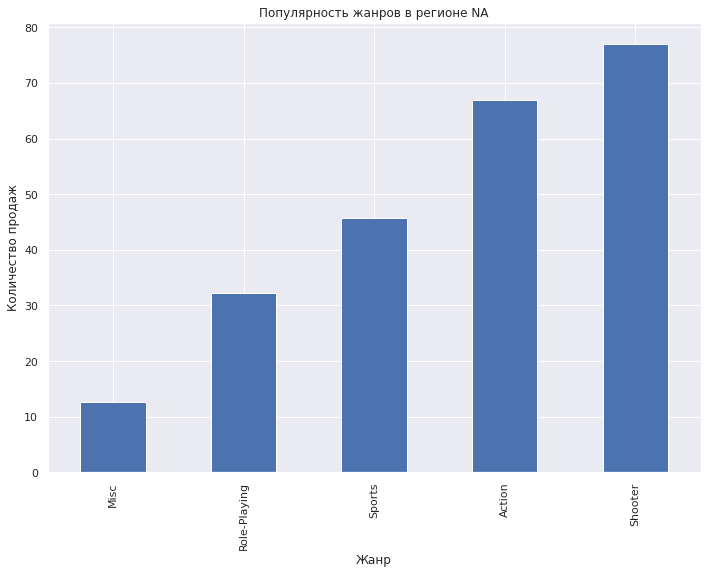

In [88]:
relevant_platforms.groupby('genre')['na_sales'].sum().sort_values().tail().plot(kind='bar');
plt.title('Популярность жанров в регионе NA')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

#### Регион EU

Text(0, 0.5, 'Количество продаж')

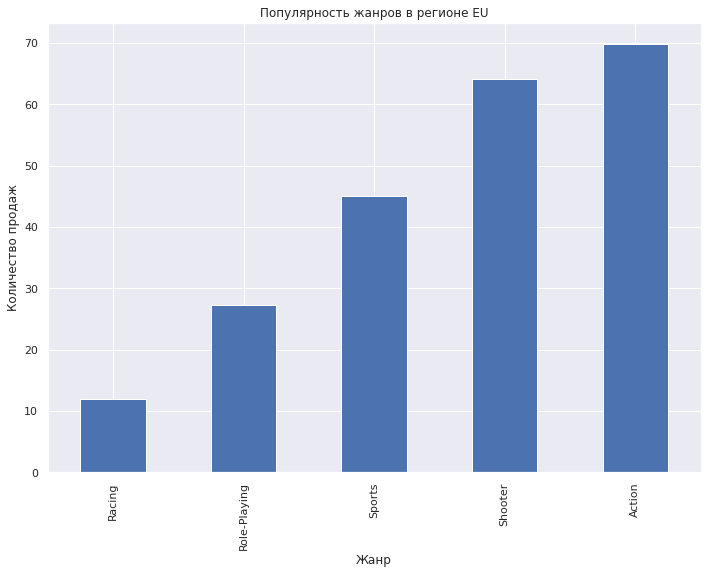

In [89]:
relevant_platforms.groupby('genre')['eu_sales'].sum().sort_values().tail().plot(kind='bar');
plt.title('Популярность жанров в регионе EU')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

#### Регион JP

Text(0, 0.5, 'Количество продаж')

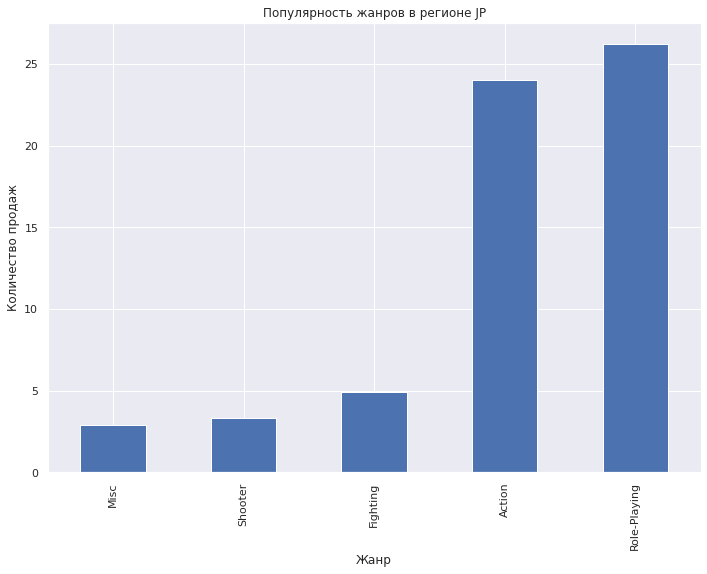

In [90]:
relevant_platforms.groupby('genre')['jp_sales'].sum().sort_values().tail().plot(kind='bar');
plt.title('Популярность жанров в регионе JP')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

*В Европе и Северной Америке топ-5 самых популярных жанров почти полностью совпали. В Японии жанры похожи, но, в отличие от первых двух регионов, вперед вырывается жанр Role-Playing, а не Action или Shooter. Популярность жанров Action может объясняться динамичностью, визуальной составляющей. В Европе и Америке также исторически популярна серия игр Counter-Strike, являющаяся одной из главных дисциплин киберспорта, который активно развивается именно в этих регионах. В азиатском регионе, в особенности в Японии, это направление особого успеха не сыскало.*

### Зависимость продаж от рейтинга ESRB

#### Регион NA

In [57]:
relevant_platforms.groupby('rating')['na_sales'].sum()

rating
E           42.66
E10+        27.46
M           95.20
NotRated    60.31
T           36.55
Name: na_sales, dtype: float64

Text(0, 0.5, 'Количество продаж')

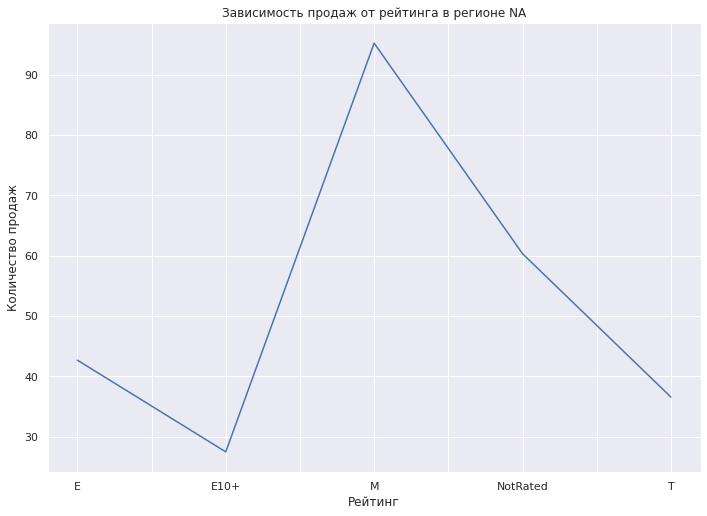

In [92]:
relevant_platforms.groupby('rating')['na_sales'].sum().plot();
plt.title('Зависимость продаж от рейтинга в регионе NA')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

#### Регион EU

In [59]:
relevant_platforms.groupby('rating')['eu_sales'].sum()

rating
E           52.07
E10+        21.04
M           92.50
NotRated    56.12
T           32.27
Name: eu_sales, dtype: float64

Text(0, 0.5, 'Количество продаж')

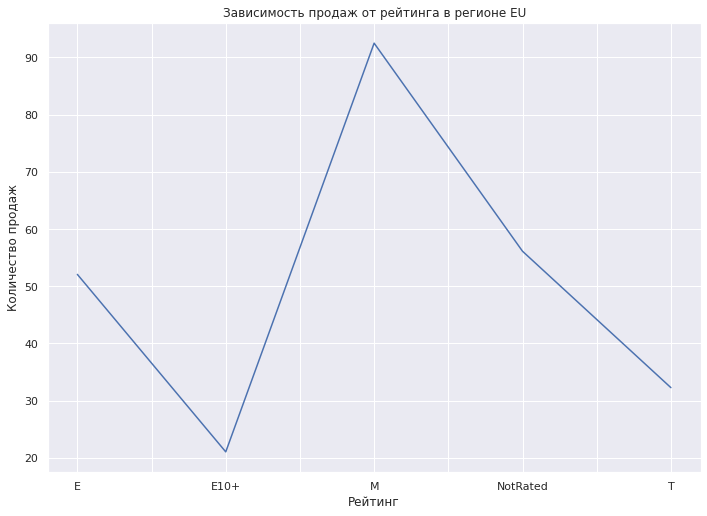

In [93]:
relevant_platforms.groupby('rating')['eu_sales'].sum().plot();
plt.title('Зависимость продаж от рейтинга в регионе EU')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

#### Регион JP

In [61]:
relevant_platforms.groupby('rating')['jp_sales'].sum()

rating
E            5.47
E10+         2.37
M            7.03
NotRated    46.01
T           10.36
Name: jp_sales, dtype: float64

Text(0, 0.5, 'Количество продаж')

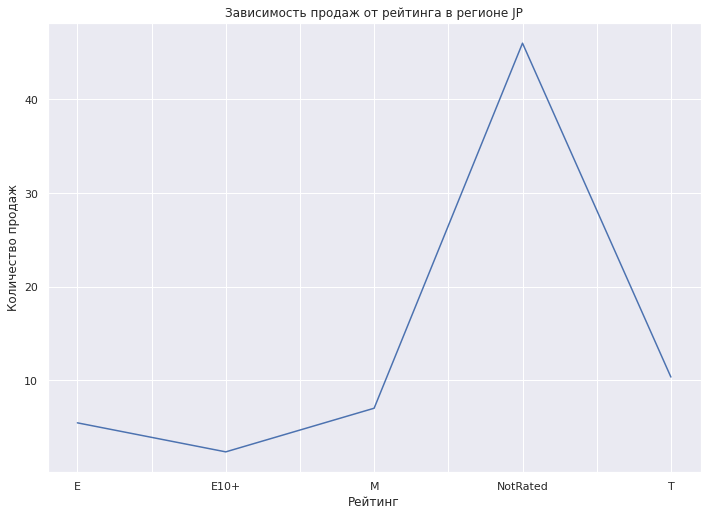

In [94]:
relevant_platforms.groupby('rating')['jp_sales'].sum().plot();
plt.title('Зависимость продаж от рейтинга в регионе JP')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

*Во всех трех регионах лидирует категории M (Mature, для взрослых), категория NotRated также показывает высокие показатели. В Европе и Северной Америке больше вырываются вперед игры с рейтингом для взрослых, в Японии наиболее популярной категорией является NotRated. Это может быть связано с тем, что японцы могут много играть игры от местных разработчиков, а так как организация ESRB американская, эти игры могут не попадать в ее поле зрения.*

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [63]:
xone_user_ratings = relevant_platforms.loc[relevant_platforms['platform'] == 'XOne', 'user_score']
pc_user_ratings = relevant_platforms.loc[relevant_platforms['platform'] == 'PC', 'user_score']

In [64]:
alpha = .05

In [65]:
result = st.ttest_ind(xone_user_ratings, pc_user_ratings)
print('p-значение:', result.pvalue)

p-значение: nan


In [66]:
xone_user_ratings.isna().sum()

63

In [67]:
xone_user_ratings.isna().count()

228

In [68]:
pc_user_ratings.isna().sum()

29

In [69]:
pc_user_ratings.isna().count()

151

*Исключим NaN*

In [70]:
xone_user_ratings = xone_user_ratings.dropna()
pc_user_ratings = pc_user_ratings.dropna()

In [71]:
result = st.ttest_ind(xone_user_ratings, pc_user_ratings)
print('p-значение:', result.pvalue)

p-значение: 0.10450507919348415


In [72]:
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


*0.1 больше 0.05, мы не можем отвергнуть гипотезу, что средние оценки пользователей XBOX One и PC равны.*

### Средние пользовательские рейтинги жанров Action и Sports разные

*За нулевую гипотезу возьмем, что средние рейтинги жанров равны, так как нулевая гипотеза всегда формулируется так, чтобы использовался знак равенства. Альтернативной гипотезой будет являться факт, что рейтинги неравны, так как нам неважно, рейтинг какого из жанров будет больше.*

In [73]:
action_ratings = relevant_platforms.loc[relevant_platforms['genre'] == 'Action', 'user_score']
sports_ratings = relevant_platforms.loc[relevant_platforms['genre'] == 'Sports', 'user_score']

In [74]:
action_ratings = action_ratings.dropna()
sports_ratings = sports_ratings.dropna()

In [75]:
results = st.ttest_ind(action_ratings, sports_ratings)
print('p-значение:', '{:.30f}'.format(results.pvalue))

p-значение: 0.000000000000000103301131642412


In [76]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


*Значение pvalue получилось очень маленькое, даже если бы alpha было 0.01, нулевую гипотезу все равно пришлось бы отвергнуть.*

*Промежуточный вывод: таким образом, не получилось отвергнуть гипотезы о равенстве пользовательских рейтингов платформ XBOX One и PC и о том, что рейтинги жанров Action и Sports разные. В проверке гипотез использовался метод ttest_ind, так как сравнивались две независимые между собой выборки.*

## Общий вывод

В исследовании рассмотрены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Выявлено, что успешность продаж игры больше всего зависит от платформы, на которой игра вышла, от ее жанра и рейтинга. Выявлено, что срок жизни платформы, пока она остается актуальной, составляет в среднем 8 лет. Исключением является PC, так как он универсален и обладает возможностью для апгрейда. Планируя рекламную кампанию на 2017 год, следует обратить внимание на игры платформ PlayStation 4 и XBOX One, так как они являются наиболее актуальными платформами на рынке за счет высокого уровня маркетингового продвижения компаний Sony и Microsoft и недавнего выхода. Продажи игр на этих платформах год от года растут. Идеальным направлением для рекламы является Северная Америка, за счет немалого населения, его высокой платежеспособности и популярности игровой индустрии. Идеальным для этого региона продукт можно назвать игру с жанром Action, Shooter или Sports, на платформе PS4 или XOne, с рейтингом M. Также стоит обратить внимание на отзывы критиков, исследование показало, что связь между отзывами экспертов и продажами игр является прямой, однако слабо выраженной. Практически та же ситуация обстоит с Европейским регионом. Рассматривая японский рынок, стоит отметить, что на нем, в большинстве своем, популярны консоли японского происхождения. Наибольшие показатели продаж показывают игры жанров Action и Role-Playing. Самой популярной категорией игр в Японии является NotRated, это может быть связано с тем, что японцы могут предпочитать игры от местных разработчиков. Эти игры могут быть не замечены американской компанией ESRB.